In [1]:
# Add this to the beginning of your PCA notebook to verify the preprocessed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the preprocessed data
df = pd.read_csv('../data/heart_disease_processed.csv')
print("Preprocessed data shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

Preprocessed data shape: (303, 15)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'target_original']

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_original
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818,0,0.0
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522,1,2.0
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931,1,1.0
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522,0,0.0
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522,0,0.0


Loading preprocessed data...
Dataset shape: (303, 15)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   sex              303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               303 non-null    float64
 12  thal             303 non-null    float64
 13  target           303 non-null    int64  
 14  target_original  303 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_original
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818,0,0.0
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522,1,2.0
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931,1,1.0
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522,0,0.0
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522,0,0.0



Feature matrix shape: (303, 13)
Target vector shape: (303,)

Feature statistics:
                age           sex            cp      trestbps          chol  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean   1.905333e-17 -2.931282e-17 -1.216482e-16  4.543487e-16  2.418308e-16   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.819115e+00 -1.457296e+00 -2.251775e+00 -2.145037e+00 -2.334877e+00   
25%   -7.135564e-01 -1.457296e+00 -1.652679e-01 -6.652997e-01 -6.905030e-01   
50%    1.729945e-01  6.862024e-01 -1.652679e-01 -9.616980e-02 -1.101357e-01   
75%    7.270888e-01  6.862024e-01  8.779855e-01  4.729601e-01  5.476139e-01   
max    2.500191e+00  6.862024e-01  8.779855e-01  3.887739e+00  6.138485e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean   5.862564e-18 -7.035077e-17 -1.172513e-16 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,target
0,1.161170,-0.946448,3.149669,2.330245,0.126219,0.069696,0.984288,-0.575035,-1.496047,-0.450637,0.192113,0.491265,0.112768,0
1,3.206647,-1.455796,-0.455543,-0.875205,-0.133656,-0.730529,0.295326,1.032152,0.448091,1.511039,-0.998795,-0.987242,1.030341,1
2,3.139792,0.633788,-0.351042,-0.604954,0.056454,-1.088284,0.546365,0.177399,0.054414,0.462412,0.333356,0.913166,-0.211978,1
3,-0.470435,1.394080,0.323100,2.832008,0.827302,-0.049813,-0.656272,-2.171140,0.890352,0.254330,-1.531375,0.132152,0.498860,0
4,-2.277420,-0.385573,-0.096178,1.181778,0.825340,-0.212056,0.705452,0.045547,1.063680,0.526370,0.927847,-0.228143,-1.113591,0



Explained variance ratio per component:
PC1: 0.2367 (0.2367 cumulative)
PC2: 0.1230 (0.3597 cumulative)
PC3: 0.0954 (0.4551 cumulative)
PC4: 0.0846 (0.5397 cumulative)
PC5: 0.0759 (0.6155 cumulative)
PC6: 0.0677 (0.6833 cumulative)
PC7: 0.0662 (0.7495 cumulative)
PC8: 0.0598 (0.8092 cumulative)
PC9: 0.0530 (0.8622 cumulative)
PC10: 0.0434 (0.9056 cumulative)
PC11: 0.0353 (0.9409 cumulative)
PC12: 0.0317 (0.9726 cumulative)
PC13: 0.0274 (1.0000 cumulative)


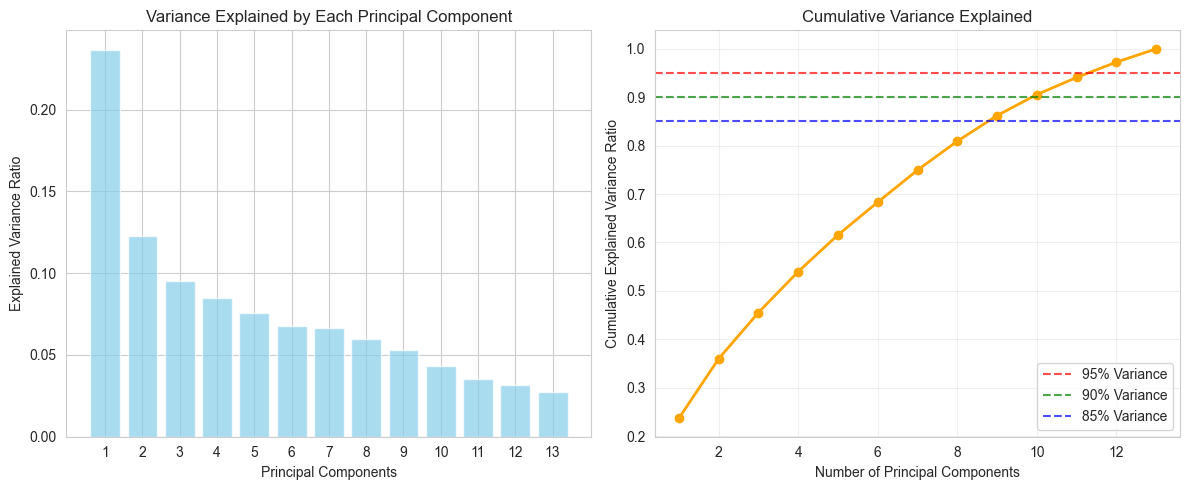


Optimal number of components:
- For 85% variance: 9 components
- For 90% variance: 10 components
- For 95% variance: 12 components

Selected 10 components (explains 90.56% variance)

PCA Loadings (First 5 components):


,PC1,PC2,PC3,PC4,PC5
age,0.5013,-0.5308,0.0012,-0.1115,-0.3676
sex,0.1989,0.5715,0.5187,-0.2544,0.1855
cp,0.5022,0.1850,-0.4536,-0.3598,0.0547
trestbps,0.2910,-0.4815,0.3878,0.1919,0.0787
chol,0.1569,-0.5572,-0.2553,-0.2140,0.3894
fbs,0.1452,-0.2443,0.5898,-0.1720,-0.1537
restecg,0.2626,-0.3417,0.0812,-0.0212,0.6521
thalach,-0.6854,-0.0568,0.2599,-0.0298,0.2977
exang,0.5875,0.2639,-0.2111,-0.1410,0.2078
oldpeak,0.6964,0.0717,0.0348,0.4354,0.0281


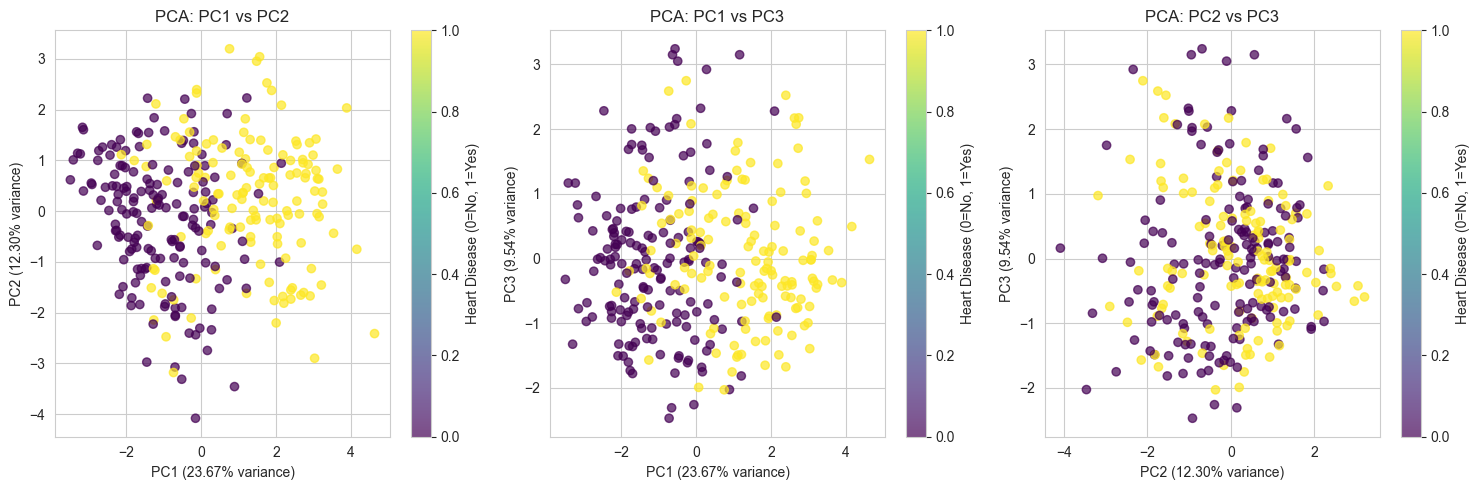


Top features for first 3 principal components:


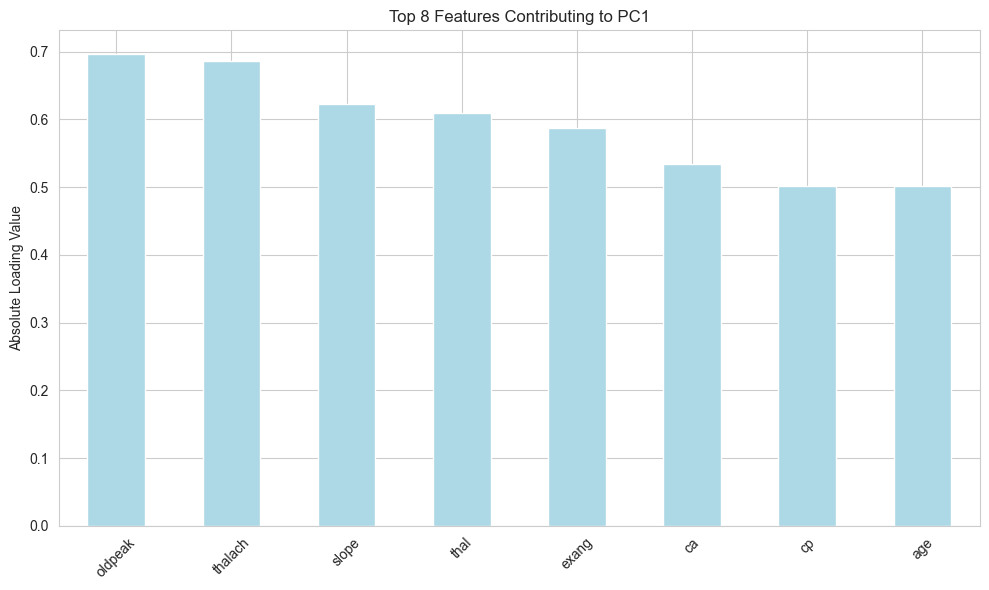


PC1 top features:
oldpeak    0.696378
thalach    0.685391
slope      0.622740
thal       0.609230
exang      0.587466
ca         0.534810
cp         0.502173
age        0.501287
Name: PC1, dtype: float64


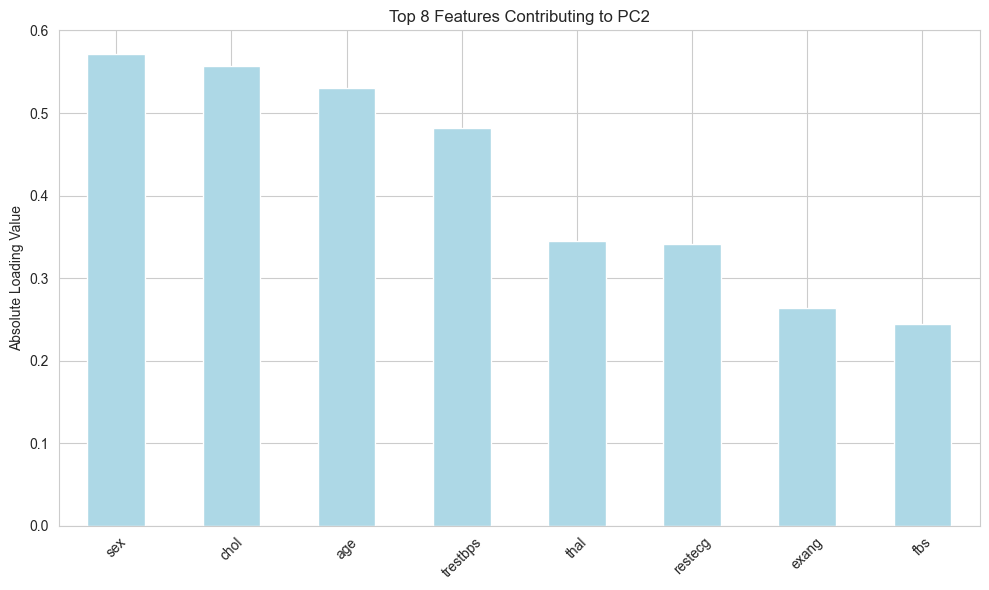


PC2 top features:
sex         0.571525
chol        0.557228
age         0.530765
trestbps    0.481485
thal        0.344764
restecg     0.341687
exang       0.263861
fbs         0.244346
Name: PC2, dtype: float64


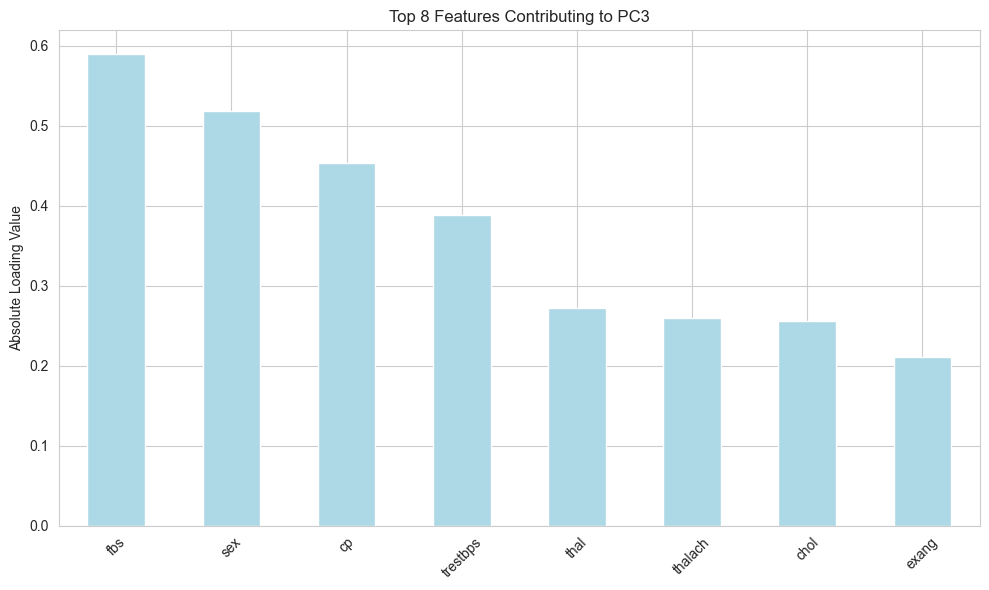


PC3 top features:
fbs         0.589827
sex         0.518711
cp          0.453645
trestbps    0.387816
thal        0.272326
thalach     0.259938
chol        0.255265
exang       0.211143
Name: PC3, dtype: float64

Creating reduced dataset with 10 principal components...
Reduced dataset shape: (303, 11)

First 5 rows of reduced data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,1.161170,-0.946448,3.149669,2.330245,0.126219,0.069696,0.984288,-0.575035,-1.496047,-0.450637,0
1,3.206647,-1.455796,-0.455543,-0.875205,-0.133656,-0.730529,0.295326,1.032152,0.448091,1.511039,1
2,3.139792,0.633788,-0.351042,-0.604954,0.056454,-1.088284,0.546365,0.177399,0.054414,0.462412,1
3,-0.470435,1.394080,0.323100,2.832008,0.827302,-0.049813,-0.656272,-2.171140,0.890352,0.254330,0
4,-2.277420,-0.385573,-0.096178,1.181778,0.825340,-0.212056,0.705452,0.045547,1.063680,0.526370,0


PCA reduced data saved to '../data/heart_disease_pca_reduced.csv'
PCA model saved to '../models/pca_model.pkl'
Reduced PCA model saved to '../models/pca_reduced_model.pkl'

Dimensionality Reduction Summary:
Original features: 13
Reduced features: 10
Variance retained: 90.56%
Data compression: 23.08%

PCA analysis completed successfully!


In [2]:
# Heart Disease UCI - PCA Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the preprocessed data
print("Loading preprocessed data...")
df = pd.read_csv('../data/heart_disease_processed.csv')

print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())

# Separate features and target
X = df.drop(['target', 'target_original'], axis=1)  # Drop target columns
y = df['target']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check if data is already scaled from preprocessing
print("\nFeature statistics:")
print(X.describe())

# Apply PCA
print("\nApplying PCA...")
pca = PCA()
X_pca = pca.fit_transform(X)

# Create a DataFrame for PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)
X_pca_df['target'] = y.values
print("PCA transformed data shape:", X_pca_df.shape)
print("\nFirst 5 rows of PCA data:")
display(X_pca_df.head())

# 1. Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained variance ratio per component:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.4f} ({cum_var:.4f} cumulative)")

plt.figure(figsize=(12, 5))

# Subplot 1: Individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))

# Subplot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', alpha=0.7, label='90% Variance')
plt.axhline(y=0.85, color='b', linestyle='--', alpha=0.7, label='85% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Determine optimal number of components
optimal_components_85 = np.where(cumulative_variance >= 0.85)[0][0] + 1
optimal_components_90 = np.where(cumulative_variance >= 0.90)[0][0] + 1
optimal_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

print(f"\nOptimal number of components:")
print(f"- For 85% variance: {optimal_components_85} components")
print(f"- For 90% variance: {optimal_components_90} components") 
print(f"- For 95% variance: {optimal_components_95} components")

# choose components that explain 85-90% of variance
n_components = optimal_components_90
print(f"\nSelected {n_components} components (explains {cumulative_variance[n_components-1]:.2%} variance)")
# 4. PCA Loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# Create loadings DataFrame
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=X.columns)

print("\nPCA Loadings (First 5 components):")
display(loadings_df.iloc[:, :5].round(4))

# 5. Visualize PCA results
# First two principal components
plt.figure(figsize=(15, 5))

# Subplot 1: PC1 vs PC2 colored by target
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.title('PCA: PC1 vs PC2')
plt.colorbar(scatter, label='Heart Disease (0=No, 1=Yes)')

# Subplot 2: PC1 vs PC3 colored by target
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca_df['PC1'], X_pca_df['PC3'], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC3 ({explained_variance[2]:.2%} variance)')
plt.title('PCA: PC1 vs PC3')
plt.colorbar(scatter, label='Heart Disease (0=No, 1=Yes)')

# Subplot 3: PC2 vs PC3 colored by target
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca_df['PC2'], X_pca_df['PC3'], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.ylabel(f'PC3 ({explained_variance[2]:.2%} variance)')
plt.title('PCA: PC2 vs PC3')
plt.colorbar(scatter, label='Heart Disease (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# 6. Feature importance in principal components
def plot_feature_importance(component_num=0, top_n=10):
    """Plot feature importance for a specific principal component."""
    component_loadings = loadings_df.iloc[:, component_num].abs().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    component_loadings.head(top_n).plot(kind='bar', color='lightblue')
    plt.title(f'Top {top_n} Features Contributing to PC{component_num + 1}')
    plt.ylabel('Absolute Loading Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return component_loadings.head(top_n)

print("\nTop features for first 3 principal components:")
for i in range(3):
    top_features = plot_feature_importance(component_num=i, top_n=8)
    print(f"\nPC{i+1} top features:")
    print(top_features)

# 7. Create reduced dataset with selected components
print(f"\nCreating reduced dataset with {n_components} principal components...")
pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(X)

# Create DataFrame for reduced features
reduced_columns = [f'PC{i+1}' for i in range(n_components)]
X_reduced_df = pd.DataFrame(X_reduced, columns=reduced_columns)
X_reduced_df['target'] = y.values

print("Reduced dataset shape:", X_reduced_df.shape)
print("\nFirst 5 rows of reduced data:")
display(X_reduced_df.head())

# 8. Save the PCA results
# Save reduced dataset
X_reduced_df.to_csv('../data/heart_disease_pca_reduced.csv', index=False)
print("PCA reduced data saved to '../data/heart_disease_pca_reduced.csv'")

# Save model for later use
import joblib
joblib.dump(pca, '../models/pca_model.pkl')
print("PCA model saved to '../models/pca_model.pkl'")

# Save reduced PCA model
joblib.dump(pca_reduced, '../models/pca_reduced_model.pkl')
print("Reduced PCA model saved to '../models/pca_reduced_model.pkl'")

# 9. Compare original vs reduced dimensionality
original_variance = np.var(X, axis=0).sum()
reduced_variance = np.var(X_reduced, axis=0).sum()
variance_retained = reduced_variance / original_variance

print(f"\nDimensionality Reduction Summary:")
print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {n_components}")
print(f"Variance retained: {variance_retained:.2%}")
print(f"Data compression: {(1 - n_components/X.shape[1]):.2%}")

print("\nPCA analysis completed successfully!")